# Creating a Simple Convolutional Neural Network

Let's begin by importing libraries...

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

Now let's load the CIFAR10 dataset. CIFAR10 is the of the most widely used datasets for supervised machine learning. It's already built inside the Keras library. We also normalize the matrices corresponding to the images and transform the labels into categorical values.


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

num_labels = len(np.unique(y_train))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

print("X_train shape: ", X_train.shape, " X_test shape: ", X_test.shape)

print("Number of labels: ", num_labels)

It's important to check the distribution of the labels to see if the dataset is balanced or not.

In [ ]:
pd.Series(np.argmax(y_train, axis=1)).value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

A perfeclty balanced dataset! That makes things easier. Let's start modeling then: we are building a very simple convolutional neural network (CNN or convnet). It's a sequential model, with a convolutional layer (with 32 filters), a flatten layer and a dense layer with neurons equal to the number of labels. We are using a softmax activation function, as we are dealing with a classification problem. We are also using Early Stopping to prevent overfitting.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 10)                288010    
                                                                 
Total params: 288906 (1.10 MB)
Trainable params: 288906 (1.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1563/1563 [==============================] - 30s 18ms/step - loss: 1.4605 - accuracy: 0.4884 - val_loss: 1.3017 - val_accuracy: 0.5334
Epoch 2/100
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1907 - accuracy: 0.5849 - val_loss: 1.2306 - val_accurac

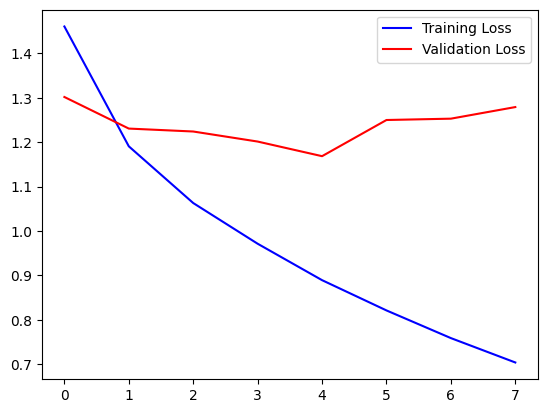

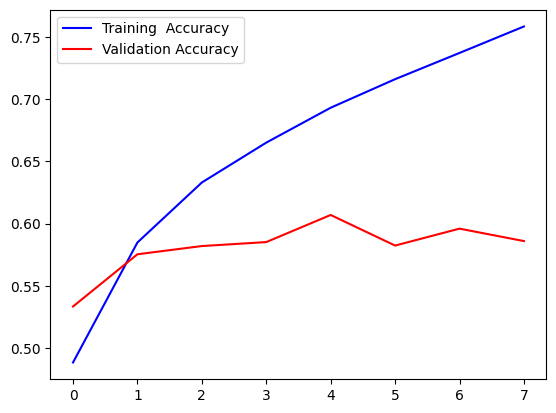

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(num_labels, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100,
validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(model.history.history['loss'],color='b',label='Training Loss')
plt.plot(model.history.history['val_loss'],color='r',label='Validation Loss')
plt.xticks(range(len(model.history.history['loss'])))
plt.legend()
plt.show()

plt.plot(model.history.history['accuracy'],color='b',
label='Training  Accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',
label='Validation Accuracy')
plt.legend()
plt.show()

We can see the model even performs reasonably for such a simple architecture, around 60% validation accuracy, but seems to be overfitting quite considerably. Let's add a Dropout layer to it and a BatchNormalization layer right after the convolutional layer.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dropout (Dropout)           (None, 28800)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                288010    
                                                                 
Total params: 289034 (1.10 MB)
Trainable params: 288970 (1.10 MB)
Non-trainable params: 64 (256.00 Byte)
_______________

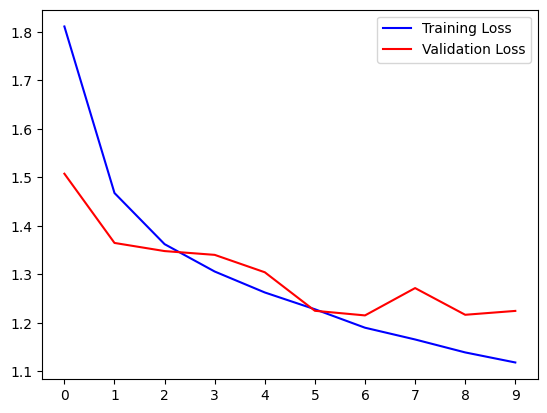

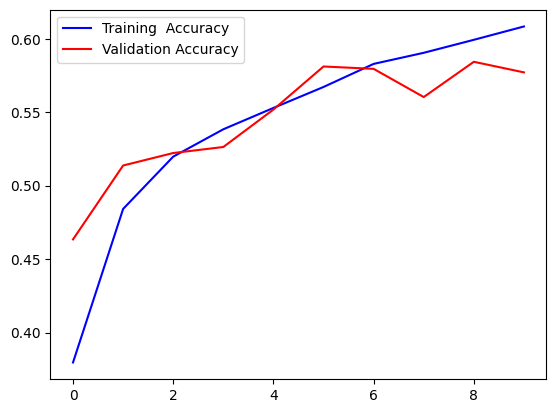

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100,
validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(model.history.history['loss'],color='b',label='Training Loss')
plt.plot(model.history.history['val_loss'],color='r',label='Validation Loss')
plt.xticks(range(len(model.history.history['loss'])))
plt.legend()
plt.show()

plt.plot(model.history.history['accuracy'],color='b',
label='Training  Accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',
label='Validation Accuracy')
plt.legend()
plt.show()

Nice! The problem was partially mitigated without losing much accuracy. Let's try adding more Conv2D layers to make the model more complex.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               2

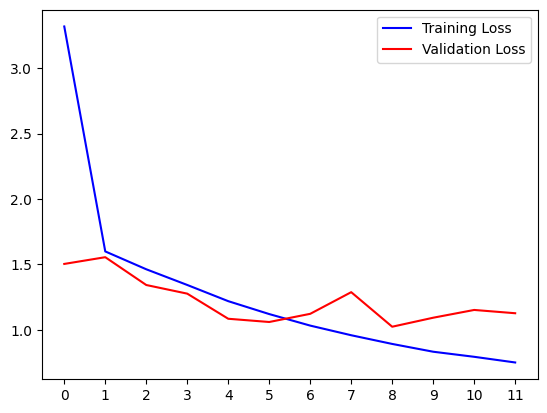

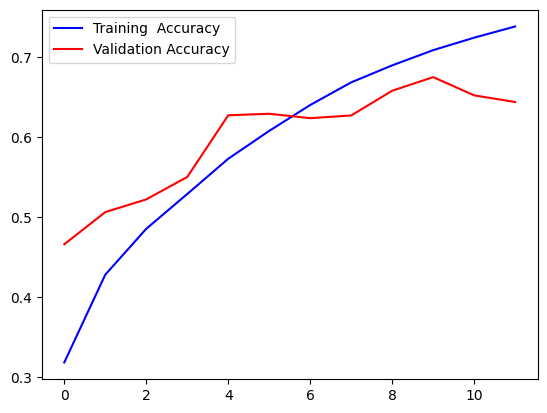

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100,
validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(model.history.history['loss'],color='b',label='Training Loss')
plt.plot(model.history.history['val_loss'],color='r',label='Validation Loss')
plt.xticks(range(len(model.history.history['loss'])))
plt.legend()
plt.show()

plt.plot(model.history.history['accuracy'],color='b',
label='Training  Accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',
label='Validation Accuracy')
plt.legend()
plt.show()

Learning seem to be more stable now and validation accuracy even showed some improvement. What if we add some MaxPooling layers?

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

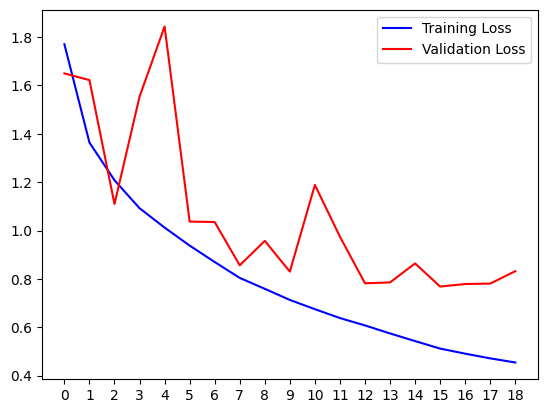

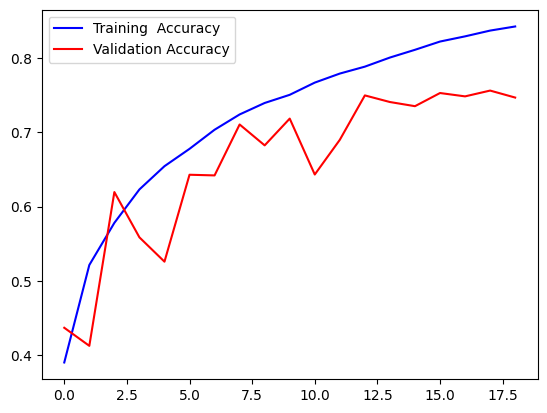

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100,
validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(model.history.history['loss'],color='b',label='Training Loss')
plt.plot(model.history.history['val_loss'],color='r',label='Validation Loss')
plt.xticks(range(len(model.history.history['loss'])))
plt.legend()
plt.show()

plt.plot(model.history.history['accuracy'],color='b',
label='Training  Accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',
label='Validation Accuracy')
plt.legend()
plt.show()

Better results! What if we add one more set of Conv2D, BatchNormalization and MaxPooling2D layers?

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_10 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_11 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                      

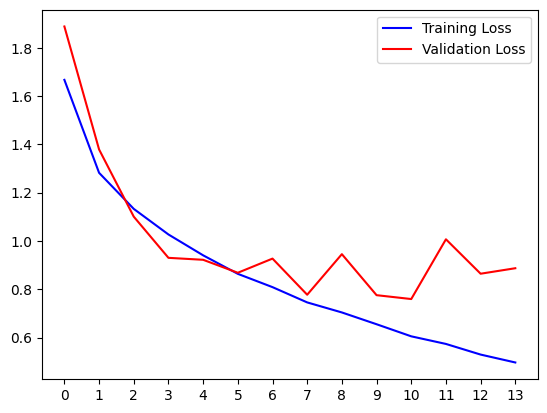

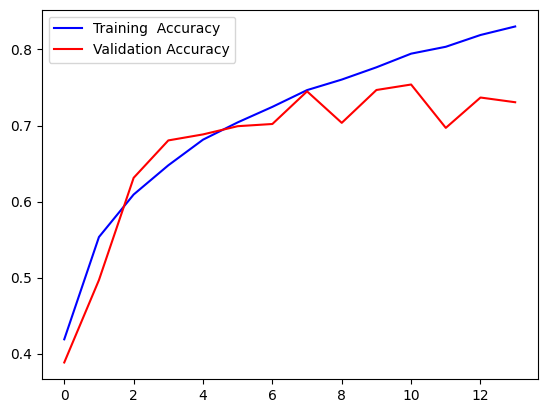

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100,
validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(model.history.history['loss'],color='b',label='Training Loss')
plt.plot(model.history.history['val_loss'],color='r',label='Validation Loss')
plt.xticks(range(len(model.history.history['loss'])))
plt.legend()
plt.show()

plt.plot(model.history.history['accuracy'],color='b',
label='Training  Accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',
label='Validation Accuracy')
plt.legend()
plt.show()

Validation accuracy evolution seems to be more stable, but we don't see improvements on validation accuracy. Let's add more Conv2D and BatchNormalization layers, so we can make the model more complex without losing the effects of BatchNormalization.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_20 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_21 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

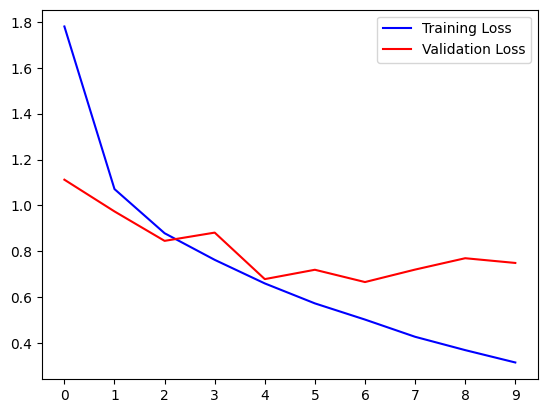

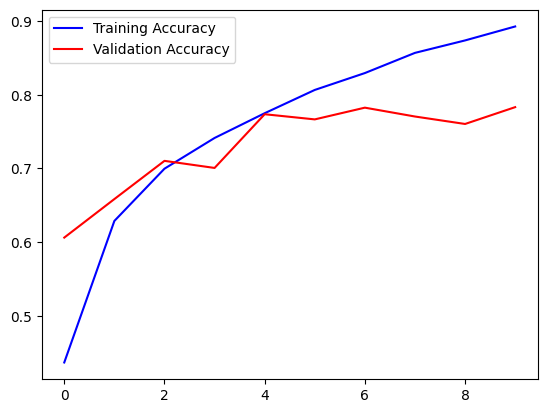

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100,
validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(model.history.history['loss'],color='b',label='Training Loss')
plt.plot(model.history.history['val_loss'],color='r',label='Validation Loss')
plt.xticks(range(len(model.history.history['loss'])))
plt.legend()
plt.show()

plt.plot(model.history.history['accuracy'],color='b',
label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',
label='Validation Accuracy')
plt.legend()
plt.show()

78% accuracy! We could still try to improve the model by fine tuning parameters such as learning rate or batch size or perform data augmentation, but we'll leave it as it is for today.